In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# -------------------- Make empyty dataframes w/ right cols to fill with data

rn_samp = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/170313_2018.pkl')
ambe_samp = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/170316_0834.pkl')

rn = pd.DataFrame(columns = list(rn_samp))
ambe = pd.DataFrame(columns = list(ambe_samp))

# ------------------- Import it ALL into one dataframe

for filename in os.listdir('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_rn_event_combine_v1/' + str(filename))
    rn = rn.append(df)

for filename in os.listdir('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/'):
    df = pd.read_pickle('/home/shawaf/calibration_data/with_new_features/pax_v6.6.5_v1/pax_v6.6.5_ambe_event_combine_v1/' + str(filename))
    ambe = ambe.append(df)

In [2]:
ambe

,run_number,event_number,s1_pattern_fit,s1_rise_time,s2_pattern_fit,s2_rise_time,cs1,cs2,drift_time,s1,...,s2_5_area_fraction_top,s2_5_corrected_area,s2_5_delay_is1,s2_5_delay_is2,s2_5_goodness_of_fit,s2_5_interior_split_fraction,s2_5_range_50p_area,s2_5_x,s2_5_y,s2_5_z
537,8078.0,537.0,41.889732,13.482330,228.970337,1107.053121,6.217429,1344.835709,226230.0,5.491423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,8078.0,774.0,142.756821,21.008457,216.669556,2046.096231,17.967157,1524.845951,523420.0,20.262516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1392,8078.0,1392.0,69.687309,66.098676,146.426544,3493.702550,11.007817,782.618803,352750.0,10.571692,...,0.503548,284.738526,1.042726e+06,690696.2500,31.076241,0.097163,107.623057,11.845238,-1.870301,-149.90544
2089,8078.0,2089.0,354.550323,45.843872,372.468750,1324.930050,227.272431,5399.587846,297310.0,211.982071,...,0.552880,104.260522,4.516108e+05,154478.3750,42.021790,0.114279,281.887601,-44.014412,-3.117168,-64.79280
2246,8078.0,2246.0,39.077778,56.397416,155.453827,4509.828157,3.023592,442.844627,606880.0,3.597684,...,0.544127,56.809904,8.936797e+04,-516616.6875,62.710339,0.119747,219.753225,-29.301378,10.847744,-12.62304
2372,8078.0,2372.0,233.765594,48.197799,255.573349,1800.104926,89.359142,4606.206933,479710.0,96.788269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3018,8078.0,3018.0,342.307983,69.283666,342.932892,1117.874229,127.268129,4872.949596,150490.0,105.378105,...,0.656456,70.737717,3.528177e+05,202733.3750,59.002567,0.000000,141.094183,12.094611,16.333960,-50.64192
5085,8078.0,5085.0,82.372658,60.692272,279.684692,1029.770063,14.708761,1238.672949,202970.0,12.774734,...,0.809411,74.429295,3.798480e+05,176105.8750,73.505447,0.067872,206.864653,22.817669,10.348997,-54.43344
5335,8078.0,5335.0,182.573151,36.856228,321.384033,1278.710670,48.994797,3985.344665,382410.0,48.486740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5336,8078.0,5336.0,58.976971,48.557648,208.516373,872.983829,10.429947,962.286947,103310.0,7.900454,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# ------------------- The linear cut used in s2 - other largest s2 space for SS

def ses2_size_cut_ori(s2_area):
    linear_0 = s2_area * 0.00832 + 72.3
    linear_1 = s2_area * 0.03 - 109
    fermi_dirac_coef_0 = 1 / (np.exp((s2_area - 23300) * 5.91e-4) + 1)
    fermi_dirac_coef_1 = 1 / (np.exp((23300 - s2_area) * 5.91e-4) + 1)
    return linear_0*fermi_dirac_coef_0+linear_1*fermi_dirac_coef_1

In [4]:
cut_ambe = ambe[ambe.s2_1_area < ses2_size_cut_ori(ambe.s2)]
cut_ambe = cut_ambe[cut_ambe.s2>200]

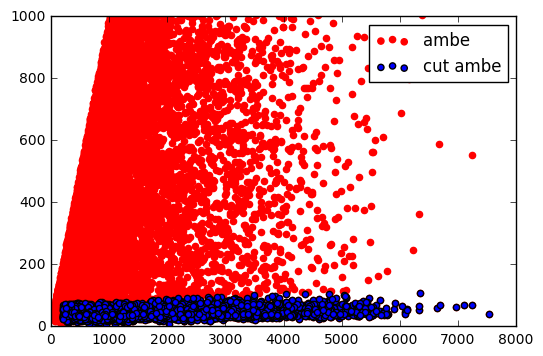

In [5]:
plt.scatter(ambe.s2,ambe.s2_1_area,color='r',label='ambe')
plt.scatter(cut_ambe.s2, cut_ambe.s2_1_area,label='cut ambe')
plt.xlim(0,8000)
plt.ylim(0,1000)
plt.legend()
plt.show()

In [6]:
# building the csv instruct file from AmBe data
want = ['x','y','z','cs1','cs2']
a = cut_ambe[want]
a['z'] = -1 * a['z']
a['cs1'] = a['cs1'] / .12
a = a.dropna()

# simulator takes s2 electrons to determine s2
pe_per_e = 25
a['cs2'] = a['cs2'] / pe_per_e

# a.to_csv('~/data/nr_ss_sim/nrsim_from_ambe_help.csv')

#Then simulate w fax

/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# Load in sim data
import hax

# using modified version of Tianyu's OtherLargeS2s peak extractor
from make_minitree import Peaks

hax.init(experiment='XENON1T',
         use_runs_db=False,
         pax_version_policy='loose',
         main_data_paths=['~/data/nr_ss_sim/nrsim_from_ambe_v_3'],
         minitree_paths = ['~/data/nr_ss_sim/nrsim_from_ambe_v_3'])

INFO:hax.__init__] Not looking for datasets in runs, db since you put use_runs_db = False


In [8]:
sim = hax.minitrees.load("nrsim_from_ambe_final",[Peaks])

DEBUG:hax.minitrees] Found minitree at /home/shawaf/data/nr_ss_sim/nrsim_from_ambe_v_3/nrsim_from_ambe_final_Peaks.root
DEBUG:hax.minitrees] Found minitree at /home/shawaf/data/nr_ss_sim/nrsim_from_ambe_v_3/nrsim_from_ambe_final_Peaks.root
DEBUG:hax.minitrees] Removing weird index column


In [9]:
sim

,cs1,cs2,event_number,goodness_of_fit,run_number,s1,s2,s2_1_area,s2_1_delay_is2,s2_1_goodness_of_fit,...,s2_5_goodness_of_fit,s2_5_range_50p_area,s2_5_x,s2_5_y,s2_5_z,s2_delay_is2,s2_range_50p_area,x,y,z
0,84.682504,5029.365926,0,150.339813,0,91.736382,1810.192993,25.641867,132117.6875,66.827194,...,46.128662,201.040577,23.815163,-19.825188,-86.99328,444879.59375,1198.000574,37.517120,-9.923904,-63.79488
1,57.062437,3429.931929,1,204.547302,0,58.366348,1370.777954,27.581923,61838.9375,51.530609,...,47.974113,185.917952,-13.840225,36.034462,-57.65760,377764.71875,1245.450535,40.797737,-5.621181,-54.04752
2,5.557393,611.606023,2,137.010651,0,5.556505,278.100525,19.284708,261915.1250,45.342449,...,NaN,NaN,NaN,NaN,NaN,367896.03125,1809.759724,17.869394,23.929934,-52.88400
3,24.358444,3184.865002,3,175.582962,0,27.416355,987.979126,33.440086,46674.4375,52.343613,...,54.727028,251.117275,-24.313910,-4.862782,-120.64464,524444.78125,1492.492263,37.948486,9.942880,-75.27168
4,292.116290,8821.123450,4,165.457001,0,257.426880,5498.790527,140.671478,55029.6250,219.042999,...,71.289948,135.067391,17.830200,9.351503,-59.27616,218444.50000,918.160976,24.441753,24.120426,-31.18464
5,297.421899,7714.289562,5,165.695160,0,280.603943,4086.678955,77.237228,122692.7500,125.091263,...,135.023987,2555.939640,-22.069550,26.807644,-78.11712,296971.46875,939.414768,26.196400,21.897301,-42.50016
6,418.795997,8453.754472,6,156.228806,0,415.330261,3624.957275,66.264832,147394.7500,132.285690,...,54.636185,366.709891,19.326441,-40.273811,-105.76368,356439.37500,1262.158384,41.711731,1.371693,-51.11856
7,245.315260,8115.049293,7,208.532166,0,275.875092,2084.743408,31.895872,27489.8750,84.818100,...,46.164257,134.984069,-9.102130,-4.364035,-64.45296,572066.50000,1757.503169,-6.860769,40.813343,-82.16064
8,70.542589,3272.103876,8,173.831345,0,60.526367,2085.513428,33.378410,249239.9375,64.765945,...,40.491589,222.835328,-10.099624,41.271305,-54.79632,190511.68750,940.975177,32.960499,22.180151,-27.25056
9,3.903826,1533.536072,9,165.213165,0,4.324240,478.239197,29.780100,658638.0625,60.768513,...,NaN,NaN,NaN,NaN,NaN,521665.84375,1022.157018,32.210030,23.362633,-74.84832


In [10]:
sim_cut = sim.dropna(subset = ['x','y','s2'])

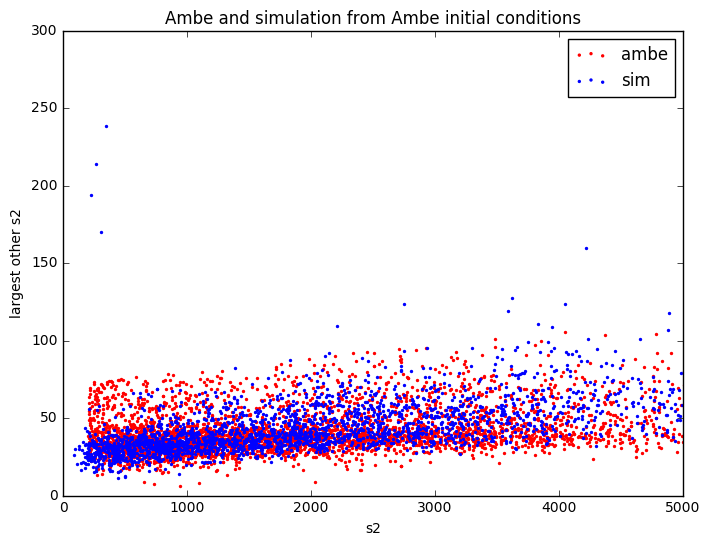

In [12]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.s2, cut_ambe.s2_1_area,label='ambe', color='r',s = 2)
plt.scatter(sim_cut.s2,sim_cut.s2_1_area,label='sim',color = 'b',s = 2)
plt.xlim(0,5000)
plt.ylim(0,300)
plt.title('Ambe and simulation from Ambe initial conditions')
plt.xlabel('s2')
plt.ylabel('largest other s2')

plt.legend(loc = 'upper right')
plt.show()

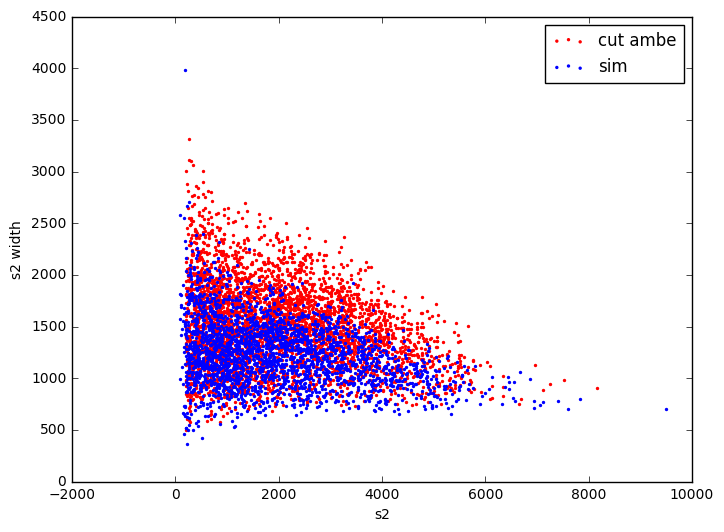

In [15]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.s2, cut_ambe.s2_range_50p_area,label='cut ambe', color='r',s = 2)
plt.scatter(sim_cut.s2,sim_cut.s2_range_50p_area,label='sim',color = 'b',s = 2)

plt.xlabel('s2')
plt.ylabel('s2 width')

plt.legend(loc = 'upper right')
plt.show()

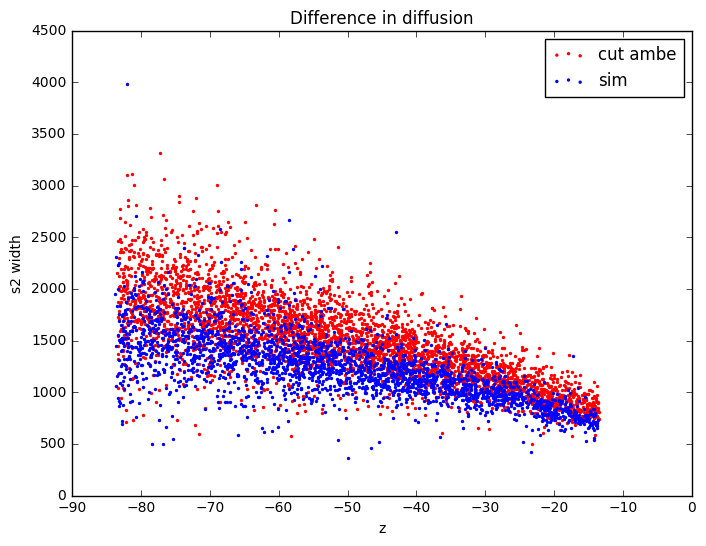

In [23]:
plt.figure(figsize = (8,6))
plt.scatter(cut_ambe.z, cut_ambe.s2_range_50p_area,label='cut ambe', color='r',s = 2)
plt.scatter(sim_cut.z,sim_cut.s2_range_50p_area,label='sim',color = 'b',s = 2)

plt.title('Difference in diffusion')
plt.xlabel('z')
plt.ylabel('s2 width')

plt.legend(loc = 'upper right')
plt.show()

/home/shawaf/anaconda3/envs/pax/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


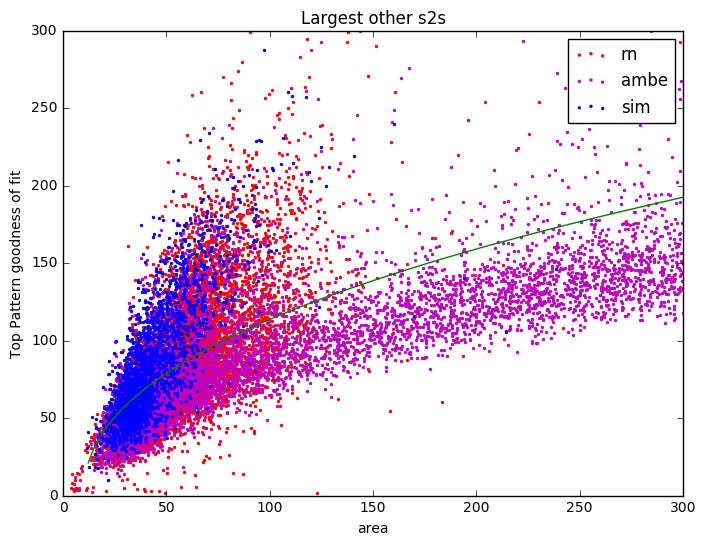

In [44]:
plt.figure(figsize = (8,6))
plt.scatter(rn.s2_1_area, rn.s2_1_goodness_of_fit,label='rn', color='r',s = 2)
plt.scatter(ambe.s2_1_area, ambe.s2_1_goodness_of_fit,label='ambe',color = 'm',s = 2)

plt.scatter(sim_cut.s2_1_area, sim_cut.s2_1_goodness_of_fit,label='sim',color = 'b',s = 2)
def area_cut(area):
    return 15*(area - 10)**.45

x = np.linspace(0,300,100)

plt.xlim(0,300)
plt.ylim(0,300)
plt.title('Largest other s2s')
plt.xlabel('area')
plt.ylabel('Top Pattern goodness of fit')

plt.plot(x, area_cut(x),color = 'g')

plt.legend(loc = 'upper right')
plt.show()

In [17]:
list(cut_ambe)

['run_number',
 'event_number',
 's1_pattern_fit',
 's1_rise_time',
 's2_pattern_fit',
 's2_rise_time',
 'cs1',
 'cs2',
 'drift_time',
 's1',
 's1_area_fraction_top',
 's1_range_50p_area',
 's2',
 's2_area_fraction_top',
 's2_range_50p_area',
 'x',
 'y',
 'z',
 's2_1_area',
 's2_1_area_fraction_top',
 's2_1_corrected_area',
 's2_1_delay_is1',
 's2_1_delay_is2',
 's2_1_goodness_of_fit',
 's2_1_interior_split_fraction',
 's2_1_range_50p_area',
 's2_1_x',
 's2_1_y',
 's2_1_z',
 's2_2_area',
 's2_2_area_fraction_top',
 's2_2_corrected_area',
 's2_2_delay_is1',
 's2_2_delay_is2',
 's2_2_goodness_of_fit',
 's2_2_interior_split_fraction',
 's2_2_range_50p_area',
 's2_2_x',
 's2_2_y',
 's2_2_z',
 's2_3_area',
 's2_3_area_fraction_top',
 's2_3_corrected_area',
 's2_3_delay_is1',
 's2_3_delay_is2',
 's2_3_goodness_of_fit',
 's2_3_interior_split_fraction',
 's2_3_range_50p_area',
 's2_3_x',
 's2_3_y',
 's2_3_z',
 's2_4_area',
 's2_4_area_fraction_top',
 's2_4_corrected_area',
 's2_4_delay_is1',
 

In [ ]:
# sim.to_pickle('/home/shawaf/calibration_data/simmed_ambe.pkl')